## Information About Dataset

**-** customer’s demographic data and category attributes which have been encoded.
Category features are fea1, fea3, fea5, fea6, fea7, fea9.

**-** label is 1, the customer is in high credit risk

**-** label is 0, the customer is in low credit risk

## Import Libraries & Load Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier
from imblearn.combine import SMOTEENN
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("customer_data.csv")
data.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


# EDA

In [3]:
data.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


<AxesSubplot:xlabel='label', ylabel='count'>

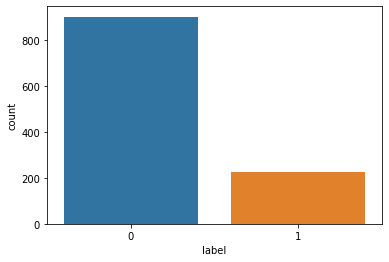

In [4]:
sns.countplot(data=data,x="label")

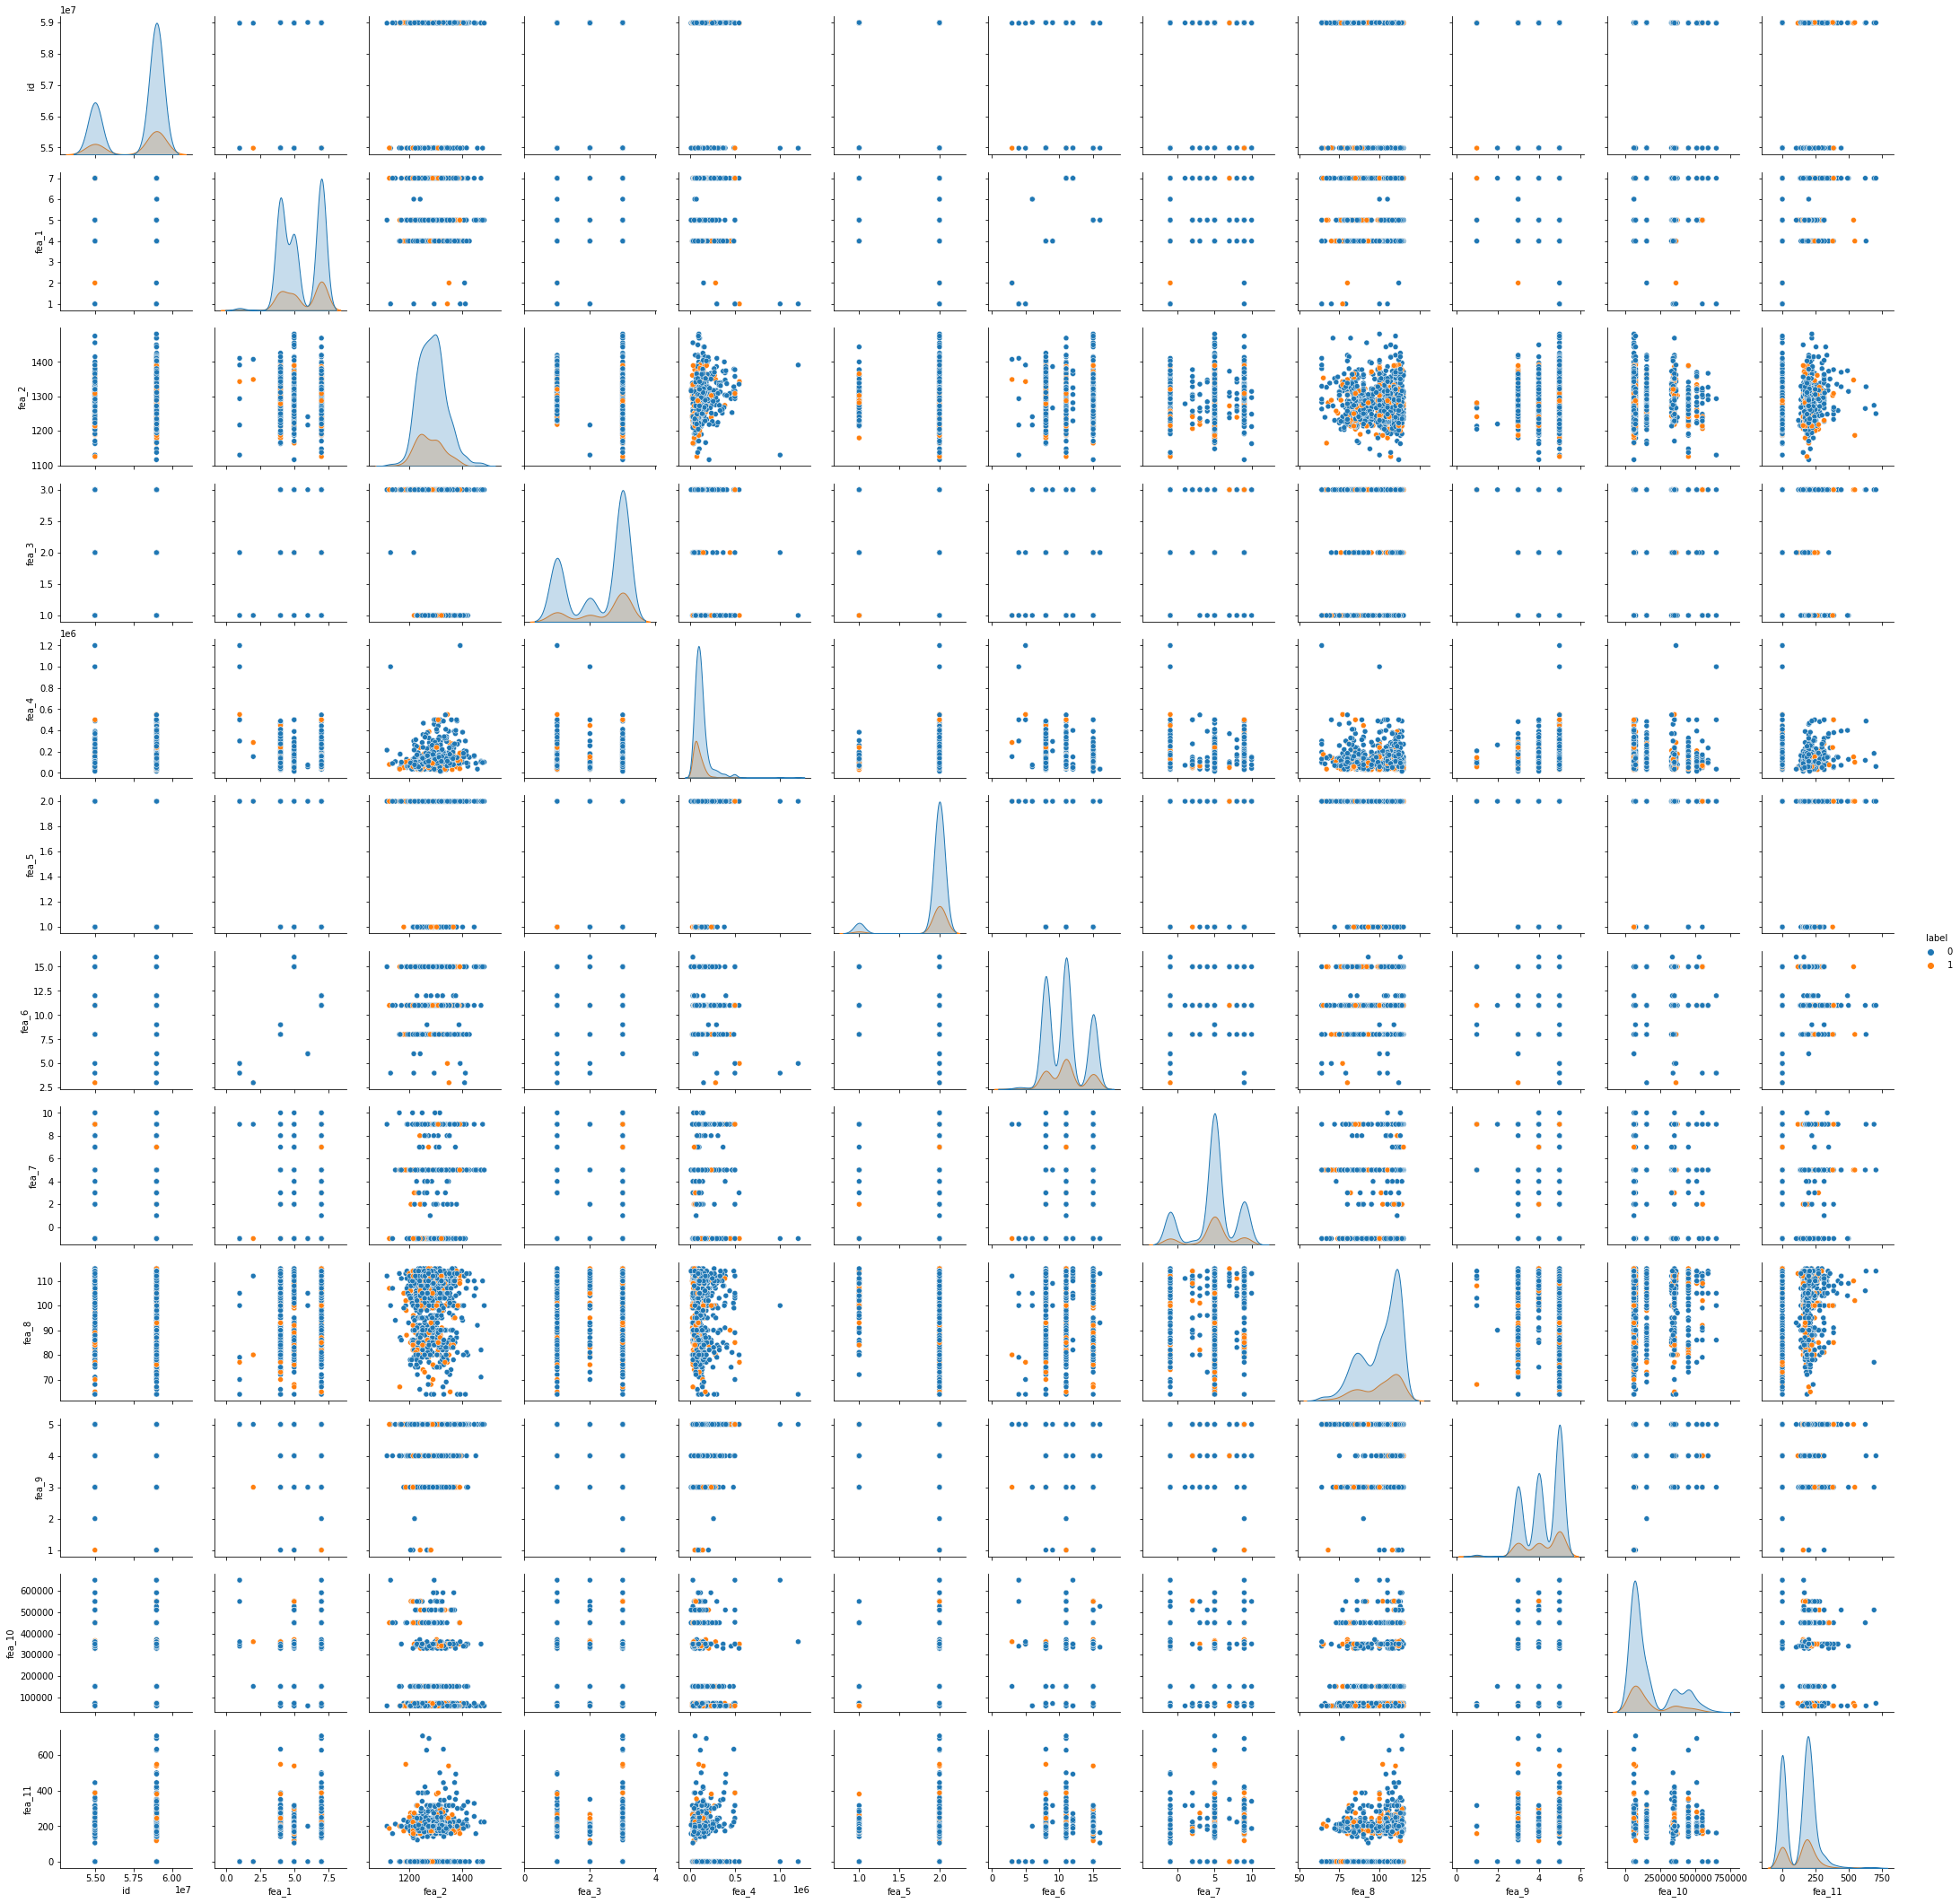

In [5]:
sns.pairplot(data,hue="label")

array([[<AxesSubplot:title={'center':'label'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'fea_1'}>,
        <AxesSubplot:title={'center':'fea_2'}>],
       [<AxesSubplot:title={'center':'fea_3'}>,
        <AxesSubplot:title={'center':'fea_4'}>,
        <AxesSubplot:title={'center':'fea_5'}>,
        <AxesSubplot:title={'center':'fea_6'}>],
       [<AxesSubplot:title={'center':'fea_7'}>,
        <AxesSubplot:title={'center':'fea_8'}>,
        <AxesSubplot:title={'center':'fea_9'}>,
        <AxesSubplot:title={'center':'fea_10'}>],
       [<AxesSubplot:title={'center':'fea_11'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

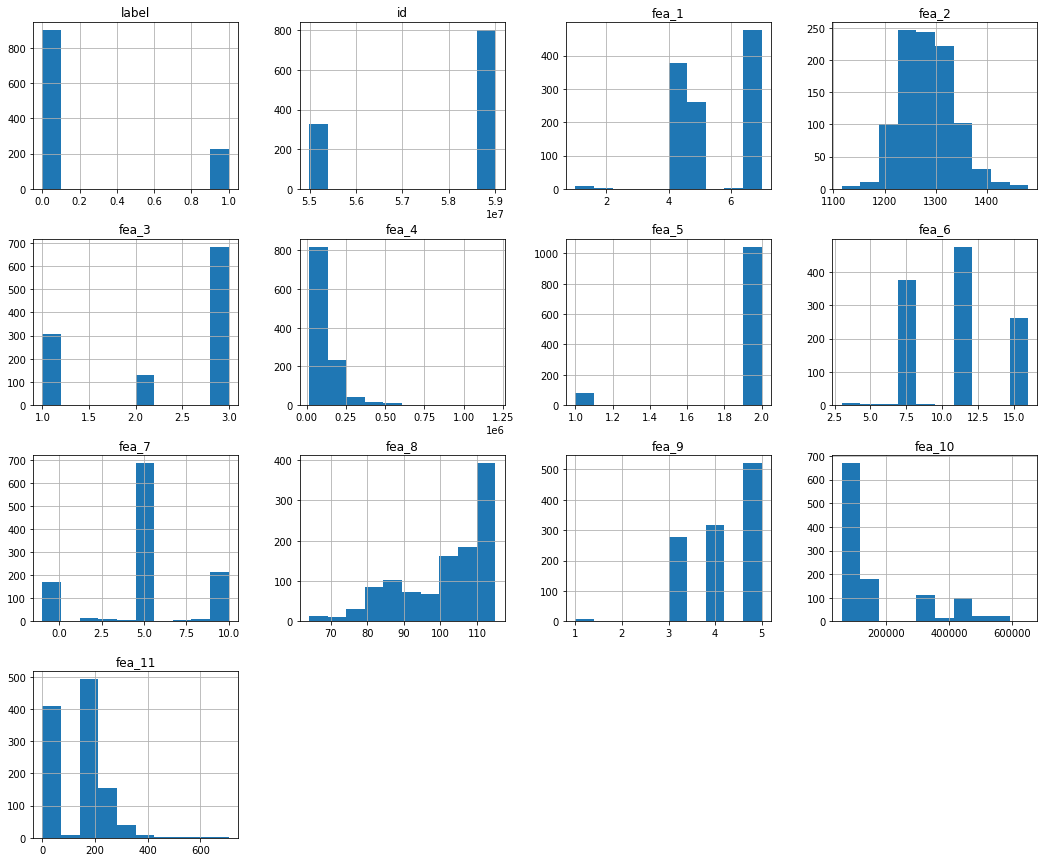

In [6]:
data.hist(figsize=(18,15))

<AxesSubplot:>

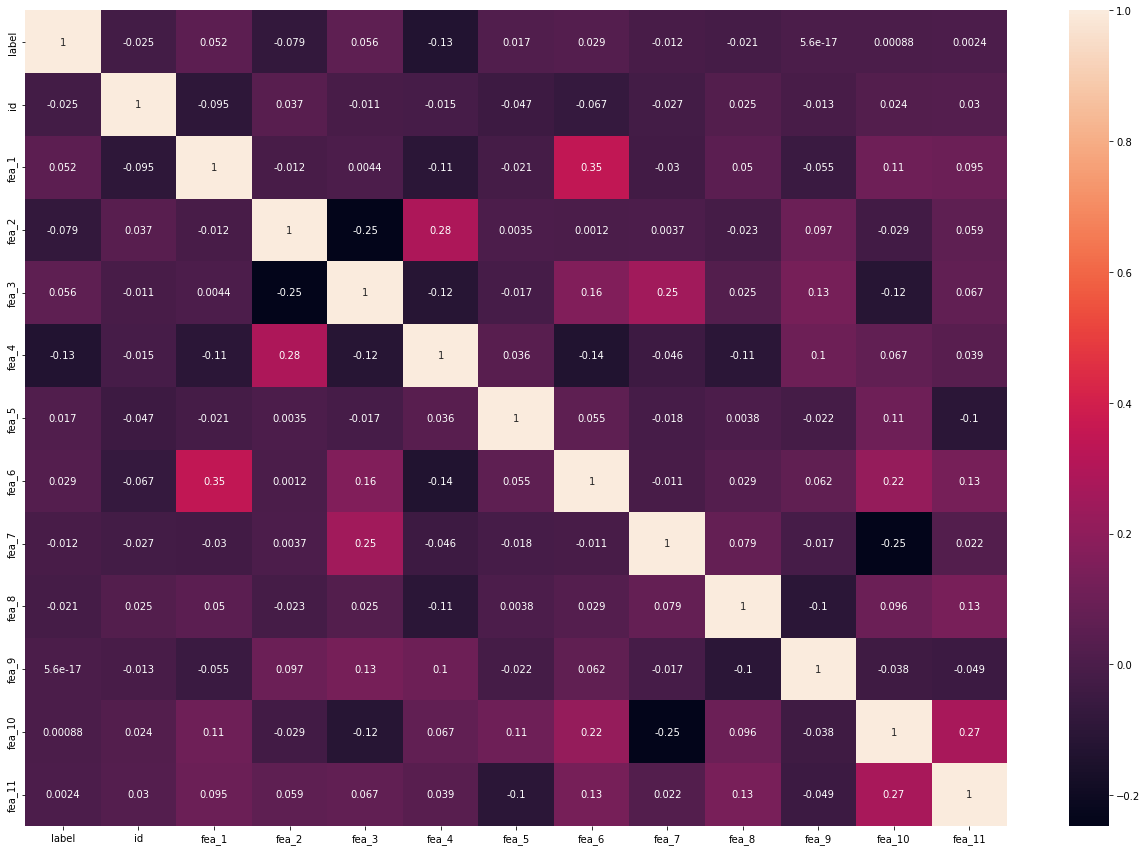

In [7]:
plt.figure(figsize=(22,15))
sns.heatmap(data.corr(),annot=True)

# Preprocessing

In [8]:
X = data.drop(["label","id"],axis=1)
Y = data.label.values

## Missing Values
### SimpleImputer - Mean

In [9]:
missing = SimpleImputer(missing_values=np.nan,strategy="mean")
X = missing.fit_transform(X)

## Balancing Data
### SMOTEENN

In [10]:
balance = SMOTEENN(random_state=2)
X,Y = balance.fit_resample(X,Y)

In [11]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

# Model

### KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
knn.fit(x_train,y_train)
predict_knn = knn.predict(x_test)

In [13]:
print(metrics.classification_report(y_test,predict_knn))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.95      0.95      0.95        76

    accuracy                           0.94       139
   macro avg       0.94      0.94      0.94       139
weighted avg       0.94      0.94      0.94       139



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


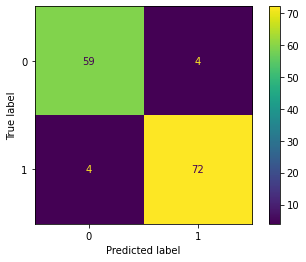

In [14]:
metrics.plot_confusion_matrix(knn,x_test,y_test)

### RandomForestClassifier

In [15]:
RF = RandomForestClassifier(random_state=1)
RF.fit(x_train,y_train)
predict_rf = RF.predict(x_test)

In [16]:
print(metrics.classification_report(y_test,predict_rf))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.97      0.95      0.96        76

    accuracy                           0.96       139
   macro avg       0.96      0.96      0.96       139
weighted avg       0.96      0.96      0.96       139



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


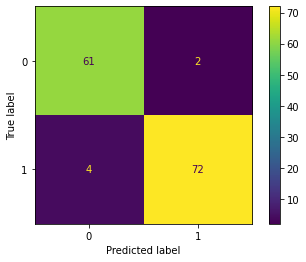

In [17]:
metrics.plot_confusion_matrix(RF,x_test,y_test)

### AdaBoostClassifier

In [18]:
adaboost = AdaBoostClassifier(GradientBoostingClassifier(),random_state=0)
adaboost.fit(x_train,y_train)
predict_ab = adaboost.predict(x_test)

In [19]:
print(metrics.classification_report(y_test,predict_ab))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        63
           1       0.96      0.95      0.95        76

    accuracy                           0.95       139
   macro avg       0.95      0.95      0.95       139
weighted avg       0.95      0.95      0.95       139



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


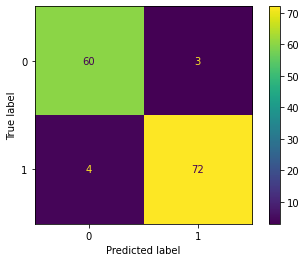

In [20]:
metrics.plot_confusion_matrix(adaboost,x_test,y_test)

### GBoostingClassifier

In [21]:
gboost = GradientBoostingClassifier(learning_rate=0.9,random_state=2)
gboost.fit(x_train,y_train)
predict_gb = gboost.predict(x_test)

In [22]:
print(metrics.classification_report(y_test,predict_gb))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.97      0.95      0.96        76

    accuracy                           0.96       139
   macro avg       0.96      0.96      0.96       139
weighted avg       0.96      0.96      0.96       139



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


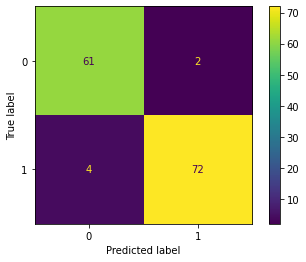

In [23]:
metrics.plot_confusion_matrix(gboost,x_test,y_test)

In [24]:
acc = [{"Algorithm":"KNeighbors",'Accuracy': metrics.accuracy_score(y_test,predict_knn),'Precision': metrics.precision_score(y_test,predict_knn),'Recall': metrics.recall_score(y_test,predict_knn),'F1-score': metrics.f1_score(y_test,predict_knn)},
        {"Algorithm":"RandomForest",'Accuracy': metrics.accuracy_score(y_test,predict_rf),'Precision': metrics.precision_score(y_test,predict_rf),'Recall': metrics.recall_score(y_test,predict_rf),'F1-score': metrics.f1_score(y_test,predict_rf)},
        {"Algorithm":"AdaBoost", 'Accuracy': metrics.accuracy_score(y_test,predict_ab),'Precision': metrics.precision_score(y_test,predict_ab),'Recall': metrics.recall_score(y_test,predict_ab),'F1-score': metrics.f1_score(y_test,predict_ab)},
        {"Algorithm":"GBoost",'Accuracy': metrics.accuracy_score(y_test,predict_gb),'Precision': metrics.precision_score(y_test,predict_gb),'Recall': metrics.recall_score(y_test,predict_gb),'F1-score': metrics.f1_score(y_test,predict_gb)}

       ] 

In [25]:
accurac = pd.DataFrame.from_dict(acc)
accurac

,Algorithm,Accuracy,Precision,Recall,F1-score
0,KNeighbors,0.942446,0.947368,0.947368,0.947368
1,RandomForest,0.956835,0.972973,0.947368,0.960000
2,AdaBoost,0.949640,0.960000,0.947368,0.953642
3,GBoost,0.956835,0.972973,0.947368,0.960000
